In [128]:
## Daylength
import numpy as np

def day_length(day_of_year, latitude):
    # Ensure arrays are numpy arrays for vectorized operations
    day_of_year = np.array(day_of_year)
    latitude_rad = np.deg2rad(latitude)
    
    P = np.arcsin(0.39795 * np.cos(0.2163108 + 2 * np.arctan(0.9671396 * np.tan(0.00860 * (day_of_year - 186)))))
    
    numerator = np.sin(np.deg2rad(0.8333)) + np.sin(latitude_rad) * np.sin(P)
    denomeanator = np.cos(latitude_rad) * np.cos(P)
    acos_arg = numerator / denomeanator

    # Clip the value to avoid NaN due to domain errors in arccos
    acos_arg = np.clip(acos_arg, -1.0, 1.0)

    day_light_hours = 24 - (24 / np.pi) * np.arccos(acos_arg)
    return day_light_hours


In [130]:
# Function to snap to nearest value in array
def snap_to_array(values, ref_array):
    idx = np.abs(values[:, None] - ref_array).argmin(axis=1)
    return ref_array[idx]

latitude = np.array([30.62827225, 31.57068063, 32.51308901, 33.45549738, 34.39790576, 35.34031414,
 36.28272251, 37.22513089, 38.16753927, 39.10994764, 40.05235602, 40.9947644,
 41.93717277, 42.87958115, 43.82198953, 44.76439791, 45.70680628, 46.64921466,
 47.59162304, 48.53403141, 49.47643979, 50.41884817, 51.36125654, 52.30366492,
 53.2460733,  54.18848168, 55.13089005, 56.07329843, 57.01570681, 57.95811518,
 58.90052356, 59.84293194, 60.78534031, 61.72774869, 62.67015707, 63.61256545,
 64.55497382, 65.4973822,  66.43979058, 67.38219895, 68.32460733, 69.26701571,
 70.20942408, 71.15183246, 72.09424084, 73.03664921, 73.97905759, 74.92146597,
 75.86387435, 76.80628272, 77.7486911,  78.69109948, 79.63350785, 80.57591623,
 81.51832461, 82.46073298, 83.40314136, 84.34554974, 85.28795812, 86.23036649,
 87.17277487, 88.11518325, 89.05759162, 90.
])
longitude = np.array([  0.,     1.25,   2.5,    3.75,   5.,     6.25,   7.5,    8.75,  10.,    11.25,
  12.5,   13.75,  15.,    16.25,  17.5,   18.75,  20.,    21.25,  22.5,   23.75,
  25.,    26.25,  27.5,   28.75,  30.,    31.25,  32.5,   33.75,  35.,    36.25,
  37.5,   38.75,  40.,    41.25,  42.5,   43.75,  45.,    46.25,  47.5,   48.75,
  50.,    51.25,  52.5,   53.75,  55.,    56.25,  57.5,   58.75,  60.,    61.25,
  62.5,   63.75,  65.,    66.25,  67.5,   68.75,  70.,    71.25,  72.5,   73.75,
  75.,    76.25,  77.5,   78.75,  80.,    81.25,  82.5,   83.75,  85.,    86.25,
  87.5,   88.75,  90.,    91.25,  92.5,   93.75,  95.,    96.25,  97.5,   98.75,
 100.,   101.25, 102.5,  103.75, 105.,   106.25, 107.5,  108.75, 110.,   111.25,
 112.5,  113.75, 115.,   116.25, 117.5,  118.75, 120.,   121.25, 122.5,  123.75,
 125.,   126.25, 127.5,  128.75, 130.,   131.25, 132.5,  133.75, 135.,   136.25,
 137.5,  138.75, 140.,   141.25, 142.5,  143.75, 145.,   146.25, 147.5,  148.75,
 150.,   151.25, 152.5,  153.75, 155.,   156.25, 157.5,  158.75, 160.,   161.25,
 162.5,  163.75, 165.,   166.25, 167.5,  168.75, 170.,   171.25, 172.5,  173.75,
 175.,   176.25, 177.5,  178.75, 180.,   181.25, 182.5,  183.75, 185.,   186.25,
 187.5,  188.75, 190.,   191.25, 192.5,  193.75, 195.,   196.25, 197.5,  198.75,
 200.,   201.25, 202.5,  203.75, 205.,   206.25, 207.5,  208.75, 210.,   211.25,
 212.5,  213.75, 215.,   216.25, 217.5,  218.75, 220.,   221.25, 222.5,  223.75,
 225.,   226.25, 227.5,  228.75, 230.,   231.25, 232.5,  233.75, 235.,   236.25,
 237.5,  238.75, 240.,   241.25, 242.5,  243.75, 245.,   246.25, 247.5,  248.75,
 250.,   251.25, 252.5,  253.75, 255.,   256.25, 257.5,  258.75, 260.,   261.25,
 262.5,  263.75, 265.,   266.25, 267.5,  268.75, 270.,   271.25, 272.5,  273.75,
 275.,   276.25, 277.5,  278.75, 280.,   281.25, 282.5,  283.75, 285.,   286.25,
 287.5,  288.75, 290.,   291.25, 292.5,  293.75, 295.,   296.25, 297.5,  298.75,
 300.,   301.25, 302.5,  303.75, 305.,   306.25, 307.5,  308.75, 310.,   311.25,
 312.5,  313.75, 315.,   316.25, 317.5,  318.75, 320.,   321.25, 322.5,  323.75,
 325.,   326.25, 327.5,  328.75, 330.,   331.25, 332.5,  333.75, 335.,   336.25,
 337.5,  338.75, 340.,   341.25, 342.5,  343.75, 345.,   346.25, 347.5,  348.75,
 350.,   351.25, 352.5,  353.75, 355.,   356.25, 357.5,  358.75])
longitude = longitude - 180


In [131]:
## Aggregate pixels
def aggregate_pixel(df):
    df["latitude"] = snap_to_array(df["latitude"].values, latitude)
    df["longitude"] = snap_to_array(df["longitude"].values, longitude)
    df = df.groupby(["latitude", "longitude"], as_index=False).mean()
    df["latitude"] = df["latitude"].round(4)
    df["longitude"] = df["longitude"].round(4)
    return df

In [ ]:
## Read AVHRR data
import pandas as pd
import numpy as np
import os
import re
def read_satellite_data():
    # 
    # Read and Prepare Data
    import pandas as pd
    import os
    
    # Load static datasets
    veg_class = pd.read_csv('..\\..\\Satellite Code\\data\\tables\\veg_class\\veg_class.csv')
    df_satellite = pd.read_csv('..\\..\\Satellite Code\\data\\tables\\phenology_climate\\avhrr.csv')
    
    # Merge satellite and vegetation class data
    df = pd.merge(df_satellite, veg_class, on=['latitude', 'longitude'], how='inner')

    df = df[df['veg_class'].isin([11, 12, 13, 14])]##.iloc[0:5000]
    
    # Separate climate/phenology columns by type
    eos_cols = [col for col in df.columns if 'eos' in col]
    t_cols = [col for col in df.columns if 'annual_t' in col]
    p_cols = [col for col in df.columns if 'annual_p' in col]
    sos_cols = [col for col in df.columns if 'sos' in col]

    years = [str(y) for y in range(1982, 2017)]

    cols = years
    df = df[[col for col in eos_cols + t_cols + p_cols + sos_cols if any(y in col for y in cols)] + ['latitude', 'longitude', 'veg_class']].copy()
    t_cols_df = [col for col in df.columns if 'annual_t' in col]
    df[t_cols_df] = df[t_cols_df] - 273.5  # Convert temperature
    df.columns = df.columns.str.replace(r'\D*(\d{4})$', lambda m: f"{m.group(0)[0:-4]}{m.group(1)}", regex=True)
    df['annual_t'] = df[[col for col in df.columns if 'annual_t' in col]].mean(axis=1)
    df['annual_p'] = df[[col for col in df.columns if 'annual_p' in col]].mean(axis=1)
    return df
# print(df)

In [ ]:
## Filter satellite data
def filter_satellite_data():
    df = read_satellite_data()
    df = df[df['veg_class'].isin([11, 12, 13, 14])]\
            # .sample(frac=1, random_state=10)\
            # .reset_index(drop=True)\
            # .iloc[0:2000]
    return df

In [136]:
## Train SOS model

In [ ]:
## Convert envir data
def convert_envir_data_sos_train(envir_data):
    import pandas as pd

    # Extract relevant columns
    mean_cols = [col for col in envir_data.columns if 'daily_mean_t' in col]

    id_vars = ['latitude', 'longitude']

    # Melt temperature datasets
    mean_df = envir_data[id_vars + mean_cols].melt(
        id_vars=id_vars, value_name='temp_mean', var_name='date_col')

    for df in [mean_df]:
        df['date'] = df['date_col'].str.extract(r'(\d{4}_\d{2}_\d{2})')

    merged_df = mean_df
    
    # Convert to datetime, extract year and DOY
    merged_df['date'] = pd.to_datetime(merged_df['date'], format='%Y_%m_%d')
    merged_df['year'] = merged_df['date'].dt.year
    merged_df['doy'] = merged_df['date'].dt.dayofyear

    # Convert from Kelvin to Celsius
    merged_df['temp_mean'] = merged_df['temp_mean'] - 273.5


    # Pivot to get one column per year/temp type
    pivot_df = merged_df.pivot_table(
        index=['latitude', 'longitude', 'doy'],
        columns='year',
        values=['temp_mean']
    ).reset_index()

    # Flatten column MultiIndex and rename properly
    pivot_df.columns = ['latitude', 'longitude', 'doy'] + [
        col.replace('temp_mean', 'daily_mean_t_1_6')
        for col in [f"{var}_{year}" for var, year in pivot_df.columns[3:]]
    ]

    # Generate full index of all DOYs per pixel
    all_doys = pd.DataFrame({'doy': range(1, 367)})
    pixels = pivot_df[['latitude', 'longitude']].drop_duplicates()
    full_index = pixels.merge(all_doys, how='cross')

    # Merge with full pivoted data
    merged_full = pd.merge(full_index, pivot_df, on=['latitude', 'longitude', 'doy'], how='left')

    # Fill missing values
    for col in merged_full.columns:
        if 'daily_mean_t_1_6' in col or 'daily_mean_t' in col or 'daily_max_t' in col:
            merged_full[col] = merged_full[col].fillna(-999)

    return merged_full

In [ ]:
# Process and merge temperature data from 1982 to 2016
def process_daily_mean_t_1_6(df):
    for year in range(1982, 2017):
        path_mean = f'../data/tables/daily_t_1982-2016/daily_mean_t_1_6/daily_mean_t_1_6_{year}.csv'
        # print("year", year)
    
        if os.path.exists(path_mean):# and os.path.exists(path_mean) and os.path.exists(path_max):
            df_mean = pd.read_csv(path_mean).drop(columns=["veg_class"])
            df_mean = aggregate_pixel(df_mean)
            # Rename columns with proper year and prefix
            def fix_column_names(df, year, prefix):
                new_columns = {}
                for col in df.columns:
                    new_col = col
                    if '_1982_' in col:
                        new_col = new_col.replace('1982', str(year))
                    # Ensure correct prefix
                    if f'daily_{prefix}_t_' not in new_col:
                        for p in ['mean']:
                            new_col = new_col.replace(f'daily_{p}_t_', f'daily_{prefix}_t_')
                    new_columns[col] = new_col
                return df.rename(columns=new_columns)
            
            # Apply renameang
            df_mean = fix_column_names(df_mean, year, prefix="mean")
    
            df_year = df_mean
            df = df.merge(df_year, on=['latitude', 'longitude'], how='inner')
            # print(df.shape)
        else:
            print(f"Missing data for year {year}. Skipping.")
    
    return df

In [139]:
# Extract phenology data for sos
def extract_phenology_data_for_sos(df):
    eos_sos_data = df.loc[:, df.columns.str.contains('sos_|eos_|latitude|longitude')]
    
    # Extract environmental data
    cols = [col for col in df.columns if any(f't_{year}' in col for year in map(str, range(1982, 2017)))] + ['latitude', 'longitude']
    # print(cols)
    # Drop seasonal/annual summaries if they exist
    seasonal_cols = ['spring', 'summer', 'autumn', 'annual']
    for year in range(1982, 2017):
        for season in seasonal_cols:
            col_name = f'{season}_t_{year}'
            if col_name in cols:
                cols.remove(col_name)
    
    envir_data = df[cols]
    # print(envir_data)
    
    # Convert environmental data
    envir_data = convert_envir_data_sos_train(envir_data)
    # print(envir_data)
    
    # De-fragment DataFrame to improve performance
    envir_data = envir_data.copy()
    
    # Add day length
    envir_data['Li'] = envir_data.apply(lambda row: day_length(row['doy'], row['latitude']), axis=1)

    return eos_sos_data, envir_data

In [ ]:
## M1
def M1_model(par, data):
    if len(par) != 3:
        raise ValueError("model parameter(s) out of range (too many, too few)")

    T_base, a, F_crit = par
    Tmean = data['Tmean']      # shape: (days, sites)
    Li = data['Li']            # shape: (days, sites)

    # Rate function: only negative values contribute
    Rf = (Tmean - T_base) * (Li / 10) **a
    Rf[Rf < 0] = 0

    # Determeane start day (t0) for chilling accumulation after day 200
    t0 = []
    for col in range(Tmean.shape[1]):
        temp_series = Tmean[:, col]
        above_base = np.where(temp_series > T_base)[0]
        later_days = above_base[above_base > 0]
        # print('later_days', later_days)
        if len(later_days) == 0:
            t0.append(1)  # Default to day 201 if none found
        else:
            t0.append(later_days[0])

    # Nullify values before t0
    for col in range(Tmean.shape[1]):
        Rf[:t0[col], col] = 0

    # Compute doy when cumulative Rf exceeds F_crit
    doy = []
    for col in range(Rf.shape[1]):
        cumulative = np.cumsum(Rf[:, col])
        # print('cumulative', cumulative)
        # print("F_crit", F_crit)
        # print("cumulative[-1]", cumulative[-1])
        valid_days = np.where(cumulative >= F_crit)[0]
        doy_val = valid_days[0] + 1 if len(valid_days) > 0 else 200
        if doy_val > 200:
            doy_val = 200
        doy.append(doy_val)

    return np.array(doy)

In [141]:
## Train, validate, and plot model performance by pixel
def get_model_list():
    import numpy as np
    import pandas as pd
    from scipy.optimize import dual_annealing
    from scipy.stats import pearsonr
    from scipy.optimize import differential_evolution
    from scipy.optimize import minimize
    
    import time 
    start_time = time.time()
    
    model_list = {
        'M1': {'fun': M1_model, 'init': [5, 0.1, 20], 'lower': [-5, 0, 0], 'upper': [20, 5, 300]},
    }
    return model_list

In [ ]:
## Train model and get params of SOS model
# from sklearn.model_selection import KFold
def train_sos_model(eos_sos_data, envir_data, model_list):
    import numpy as np
    import time
    from scipy.optimize import dual_annealing
    maxiteration = 10

    # Extract available years from sos_sos_data
    all_sos_cols = [col for col in eos_sos_data.columns if col.startswith('sos_')]
    available_years = sorted([int(col.split('_')[1]) for col in all_sos_cols])
    
    
    pixel_results = []
    params = []
    start_time = time.time()
    
    
    for pixel_index, site in eos_sos_data.iterrows():
        # print(pixel_index)
        # print(site)
        target_lat = site['latitude']
        target_lon = site['longitude']

        pixel_test_rmse_all_folds = {model: [] for model in model_list}
        pixel_test_aic_all_folds = {model: [] for model in model_list}
    
        train_years = available_years
    
        mean_t_train_cols = [f'daily_mean_t_1_6_{year}' for year in train_years]
        sos_train_cols = [f'sos_{year}' for year in train_years]
        envir_sub = envir_data[(envir_data["latitude"] == target_lat) & 
            (envir_data["longitude"] == target_lon)].dropna()
    
        Li_train = np.tile(envir_sub['Li'].values[:, None], (1, len(train_years)))
    
        for model_name, model_info in model_list.items():
            observed_DOY_train = site[sos_train_cols].astype(float).to_numpy()
    
            data_list_train = {
                'Tmean': envir_sub[mean_t_train_cols].to_numpy(),
                'Li': Li_train,
                'transition_dates': observed_DOY_train
            }
    
            def cost_function(par):
                if not np.all(np.isfinite(par)):
                    return 1e10
                try:
                    predicted = model_info['fun'](par, data_list_train)
                except:
                    return 1e10
    
                if predicted is None or not np.all(np.isfinite(predicted)):
                    return 1e10
                return np.sqrt(np.mean((predicted - observed_DOY_train) ** 2))
            # print(data_list_train)
            bounds = list(zip(model_info['lower'], model_info['upper']))
            result = dual_annealing(cost_function, bounds=bounds, maxiter=maxiteration, seed=42)
            # params.append(result.x)
            params.append({
                'latitude': target_lat,
                'longitude': target_lon,
                'model': model_name,
                'params': result.x
            })
    
    print("Calibration done!")
    end_time = time.time()
    print(f"Time taken: {end_time - start_time:.2f} seconds")
    print(params)
    return params

In [143]:
## Train SOS model and get params
df = filter_satellite_data()
df = aggregate_pixel(df)

In [144]:
df = df.iloc[1600:] ## Change to [0:1600] or [1600:]

In [145]:
df = process_daily_mean_t_1_6(df)
eos_sos_data, envir_data = extract_phenology_data_for_sos(df)

In [146]:
model_list = get_model_list()
m1_params = train_sos_model(eos_sos_data, envir_data, model_list)
# print(m1_params)

Calibration done!
Time taken: 128.93 seconds
[{'latitude': 53.2461, 'longitude': -98.75, 'model': 'M1', 'params': array([ -3.80488622,   2.06586816, 129.41592038])}, {'latitude': 53.2461, 'longitude': -97.5, 'model': 'M1', 'params': array([ -0.58024184,   3.16420759, 227.72445284])}, {'latitude': 53.2461, 'longitude': -95.0, 'model': 'M1', 'params': array([ -1.46890501,   0.6530598 , 192.02691551])}, {'latitude': 53.2461, 'longitude': -93.75, 'model': 'M1', 'params': array([ 1.68196106,  2.02271602, 91.60677292])}, {'latitude': 53.2461, 'longitude': -92.5, 'model': 'M1', 'params': array([  0.65924069,   3.67776814, 209.02762798])}, {'latitude': 53.2461, 'longitude': -91.25, 'model': 'M1', 'params': array([ -2.36751312,   2.44630377, 254.85893351])}, {'latitude': 53.2461, 'longitude': -90.0, 'model': 'M1', 'params': array([  0.65924069,   3.04772053, 209.02762798])}, {'latitude': 53.2461, 'longitude': -88.75, 'model': 'M1', 'params': array([  0.65924069,   3.04772053, 209.02762798])}, {

In [147]:
pd.to_pickle(m1_params, "..\\data\\tables\\params\\ssp245\\m1_params_1600_3200.pkl") ## Change to ssp245 or ssp585

In [149]:
## Predict SOS

In [ ]:
## Convert envir data
def convert_envir_data_sos_predict(envir_data):
    import pandas as pd
    # print(envir_data)
    # Extract relevant columns
    mean_cols = [col for col in envir_data.columns if 'daily_mean_t' in col]

    id_vars = ['latitude', 'longitude']

    # Melt temperature datasets
    mean_df = envir_data[id_vars + mean_cols].melt(
        id_vars=id_vars, value_name='temp_mean', var_name='date_col')

    for df in [mean_df]:
        df['date'] = df['date_col'].str.extract(r'(\d{4}_\d{2}_\d{2})')

    merged_df = mean_df
    
    # Convert to datetime, extract year and DOY
    merged_df['date'] = pd.to_datetime(merged_df['date'], format='%Y_%m_%d')
    merged_df['year'] = merged_df['date'].dt.year
    merged_df['doy'] = merged_df['date'].dt.dayofyear

    # Convert from Kelvin to Celsius
    merged_df['temp_mean'] = merged_df['temp_mean'] - 0
    # print(merged_df)

    # Pivot to get one column per year/temp type
    pivot_df = merged_df.pivot_table(
        index=['latitude', 'longitude', 'doy'],
        columns='year',
        values=['temp_mean']
    ).reset_index()

    # Flatten column MultiIndex and rename properly
    pivot_df.columns = ['latitude', 'longitude', 'doy'] + [
        col.replace('temp_mean', 'daily_mean_t')
        for col in [f"{var}_{year}" for var, year in pivot_df.columns[3:]]
    ]

    # Generate full index of all DOYs per pixel
    all_doys = pd.DataFrame({'doy': range(1, 367)})
    pixels = pivot_df[['latitude', 'longitude']].drop_duplicates()
    full_index = pixels.merge(all_doys, how='cross')

    # Merge with full pivoted data
    merged_full = pd.merge(full_index, pivot_df, on=['latitude', 'longitude', 'doy'], how='left')

    # Fill missing values
    for col in merged_full.columns:
        if 'daily_mean_t' in col or 'daily_min_t' in col or 'daily_max_t' in col:
            merged_full[col] = merged_full[col].fillna(-999)

    return merged_full

In [ ]:
def match_pixel_with_future_mean_t(df, start_year, end_year):
    import os
    import pandas as pd
    from datetime import datetime, timedelta
    import time

    start = time.time()

    # Helper function
    def doy_to_date(year, doy):
        """Convert year + day-of-year to string YYYY_MM_DD."""
        return (datetime(year, 1, 1) + timedelta(days=int(doy) - 1)).strftime("%Y_%m_%d")

    # Year loop 
    if start_year == 2095:
        end = start_year + 5
    else:
        if end_year == 2100:
            end = end_year - 4
        else:
            end = end_year - 9

    for year in range(start_year, end, 10):  # 2025, 2035, ..., 2095
        path_mean = f"../data/tables/daily_t_p_2025-2100/ssp245/daily_mean_t_clipped/daily_mean_t_clipped_2025-2100_ssp245_pixel_{year}.csv"
        print(path_mean)
        if not os.path.exists(path_mean):
            print(f"Missing data for year {year}. Skipping.")
            continue

        # Load climate grid
        df_mean = pd.read_csv(path_mean)

        # Add date column
        df_mean["date"] = [doy_to_date(y, d) for y, d in zip(df_mean["year"], df_mean["doy"])]

        # Keep only needed columns
        df_mean = df_mean[["lat", "lon", "date", "tas"]]
        # print(df_mean)
        
        # Pivot into wide format (lat/lon as index, each day a column)
        df_mean_pivot = df_mean.pivot(
            index=["lat", "lon"],
            columns="date",
            values="tas"
        ).reset_index()

        # Rename columns
        df_mean_pivot = df_mean_pivot.rename(
            columns={col: f"daily_mean_t_{col}" for col in df_mean_pivot.columns if col not in ["lat", "lon"]}
        )

        # Merge with df on snapped coordinates
        df = df.merge(
            df_mean_pivot,
            left_on=["latitude", "longitude"],
            right_on=["lat", "lon"],
            how="inner"
        ).drop(columns=["lat", "lon"])

    # Finalize
    df = df.reset_index(drop=True)

    end = time.time()
    print(f"Elapsed time: {end - start:.2f} seconds")
    return df


In [153]:
# Extract phenology data
def extract_phenology_data_for_sos(df, start_year, end_year):
    eos_sos_data = df.loc[:, df.columns.str.contains('sos_|eos_|latitude|longitude')]


    # Extract environmental data
    cols = [col for col in df.columns if any(f't_{year}' in col for year in map(str, range(start_year, end_year + 1)))] + ['latitude', 'longitude']
    # print(cols)
    # Drop seasonal/annual summaries if they exist
    seasonal_cols = ['spring', 'summer', 'autumn', 'annual']
    for year in range(start_year, end_year):
        for season in seasonal_cols:
            col_name = f'{season}_t_{year}'
            if col_name in cols:
                cols.remove(col_name)
    
    envir_data = df[cols]
    # print(envir_data)
    
    # Convert environmental data
    envir_data = convert_envir_data_sos_predict(envir_data)
    # print(envir_data)
    
    # De-fragment DataFrame to improve performance
    envir_data = envir_data.copy()
    
    # Add day length
    envir_data['Li'] = envir_data.apply(lambda row: day_length(row['doy'], row['latitude']), axis=1)

    return eos_sos_data, envir_data

In [ ]:
## Predict SOS
def predict_sos(eos_sos_data, envir_data, params, model_list, start_year, end_year):
    import numpy as np
    import time

    pixel_results = []
    start_time = time.time()
    available_years = list(range(start_year, end_year + 1))  # 2025, 2026, ..., 2100

    for pixel_index, site in eos_sos_data.iterrows():
        target_lat = site['latitude']
        target_lon = site['longitude']
        envir_sub_sos = envir_data[
            (envir_data["latitude"] == target_lat) & 
            (envir_data["longitude"] == target_lon)
        ].dropna()
        train_years = available_years
        mean_t_train_cols = [f'daily_mean_t_{year}' for year in train_years]
        # sos_train_cols = [f'sos_{year}' for year in train_years]
        Li_train = np.tile(envir_sub_sos['Li'].values[:, None], (1, len(train_years)))

        
        pixel_params = [
            d for d in params
            if d["latitude"] == target_lat and d["longitude"] == target_lon
        ] ## Match by latitude and longitude
        
        for param in pixel_params:
            # print(param)
            model_name = param['model']
            model_params = param['params']
            model_info = model_list[model_name]#['fun']
            
            par = model_params
            
            data_list_train = {
                'Tmean': envir_sub_sos[mean_t_train_cols].to_numpy(),
                'Li': Li_train,
                # 'transition_dates': observed_DOY_train
            }
    
            # prediction
            predicted = model_info['fun'](par, data_list_train)
            # print(predicted)
            if predicted is None or not np.all(np.isfinite(predicted)):
                print('predicted none')
                continue

            pixel_results.append({
                'latitude': target_lat,
                'longitude': target_lon,
                'model': model_name,
                'predicted': predicted.tolist()
            })
    
    print("Prediction done!")
    end_time = time.time()
    print(f"Time taken: {end_time - start_time:.2f} seconds")
    return pixel_results

In [155]:
## Show SOS trend
def plot_sos_trend(pixel_results, start_year, end_year):
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Extract number of years from first entry
    n_years = len(pixel_results[0]['predicted'])
    years = list(range(start_year, start_year + n_years))
    
    # Collect predictions from all pixels into an array
    all_preds = np.array([res['predicted'] for res in pixel_results])
    
    # Compute mean & std across pixels for each year
    mean_vals = np.mean(all_preds, axis=0)
    std_vals = np.std(all_preds, axis=0)
    
    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(years, mean_vals, color="blue", marker="o", label="Mean SOS")
    plt.fill_between(years, mean_vals - std_vals, mean_vals + std_vals, 
                     color="blue", alpha=0.2, label="±1 Std Dev")
    
    plt.xlabel("Year")
    plt.ylabel("SOS (Day of Year)")
    plt.title("Predicted SOS Trend (2025–2100)\nMean ± Std Across Pixels")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [156]:
## Train, validate, and plot model performance by pixel
def get_model_list():
    import numpy as np
    import pandas as pd
    from scipy.optimize import dual_annealing
    from scipy.stats import pearsonr
    from scipy.optimize import differential_evolution
    from scipy.optimize import minimize
    
    import time 
    start_time = time.time()
    
    model_list = {
        'M1': {'fun': M1_model, 'init': [5, 0.1, 20], 'lower': [-5, 0, 0], 'upper': [20, 5, 300]},
    }
    return model_list

In [ ]:
## M1
def M1_model(par, data):
    if len(par) != 3:
        raise ValueError("model parameter(s) out of range (too many, too few)")

    T_base, a, F_crit = par
    Tmean = data['Tmean']      # shape: (days, sites)
    Li = data['Li']            # shape: (days, sites)

    # Rate function: only negative values contribute
    Rf = (Tmean - T_base) * (Li / 10) **a
    Rf[Rf < 0] = 0

    # Determeane start day (t0) for chilling accumulation after day 200
    t0 = []
    for col in range(Tmean.shape[1]):
        temp_series = Tmean[:, col]
        above_base = np.where(temp_series > T_base)[0]
        later_days = above_base[above_base > 0]
        # print('later_days', later_days)
        if len(later_days) == 0:
            t0.append(1)  # Default to day 201 if none found
        else:
            t0.append(later_days[0])

    # Nullify values before t0
    for col in range(Tmean.shape[1]):
        Rf[:t0[col], col] = 0

    # Compute doy when cumulative Rf exceeds F_crit
    doy = []
    for col in range(Rf.shape[1]):
        cumulative = np.cumsum(Rf[:, col])
        # print('cumulative', cumulative)
        # print("F_crit", F_crit)
        # print("cumulative[-1]", cumulative[-1])
        valid_days = np.where(cumulative >= F_crit)[0]
        doy_val = valid_days[0] + 1 if len(valid_days) > 0 else 200
        if doy_val > 200:
            doy_val = 200
        doy.append(doy_val)

    return np.array(doy)

In [158]:
## Predict SOS and get trends
start_year = 2025
end_year = 2100
df = filter_satellite_data()
df = aggregate_pixel(df)

In [159]:
df = df.iloc[1600:]

In [161]:
df = match_pixel_with_future_mean_t(df, start_year, end_year)

../data/tables/daily_t_p_2025-2100/ssp245/daily_mean_t_clipped/daily_mean_t_clipped_2025-2100_ssp245_pixel_2025.csv
../data/tables/daily_t_p_2025-2100/ssp245/daily_mean_t_clipped/daily_mean_t_clipped_2025-2100_ssp245_pixel_2035.csv
../data/tables/daily_t_p_2025-2100/ssp245/daily_mean_t_clipped/daily_mean_t_clipped_2025-2100_ssp245_pixel_2045.csv
../data/tables/daily_t_p_2025-2100/ssp245/daily_mean_t_clipped/daily_mean_t_clipped_2025-2100_ssp245_pixel_2055.csv
../data/tables/daily_t_p_2025-2100/ssp245/daily_mean_t_clipped/daily_mean_t_clipped_2025-2100_ssp245_pixel_2065.csv
../data/tables/daily_t_p_2025-2100/ssp245/daily_mean_t_clipped/daily_mean_t_clipped_2025-2100_ssp245_pixel_2075.csv
../data/tables/daily_t_p_2025-2100/ssp245/daily_mean_t_clipped/daily_mean_t_clipped_2025-2100_ssp245_pixel_2085.csv
../data/tables/daily_t_p_2025-2100/ssp245/daily_mean_t_clipped/daily_mean_t_clipped_2025-2100_ssp245_pixel_2095.csv
Elapsed time: 598.16 seconds


In [163]:
m1_params = pd.read_pickle("..\\data\\tables\\params\\ssp245\\m1_params_1600_3200.pkl")
eos_sos_data, envir_data = extract_phenology_data_for_sos(df, start_year, end_year)

Prediction done!
Time taken: 10.32 seconds


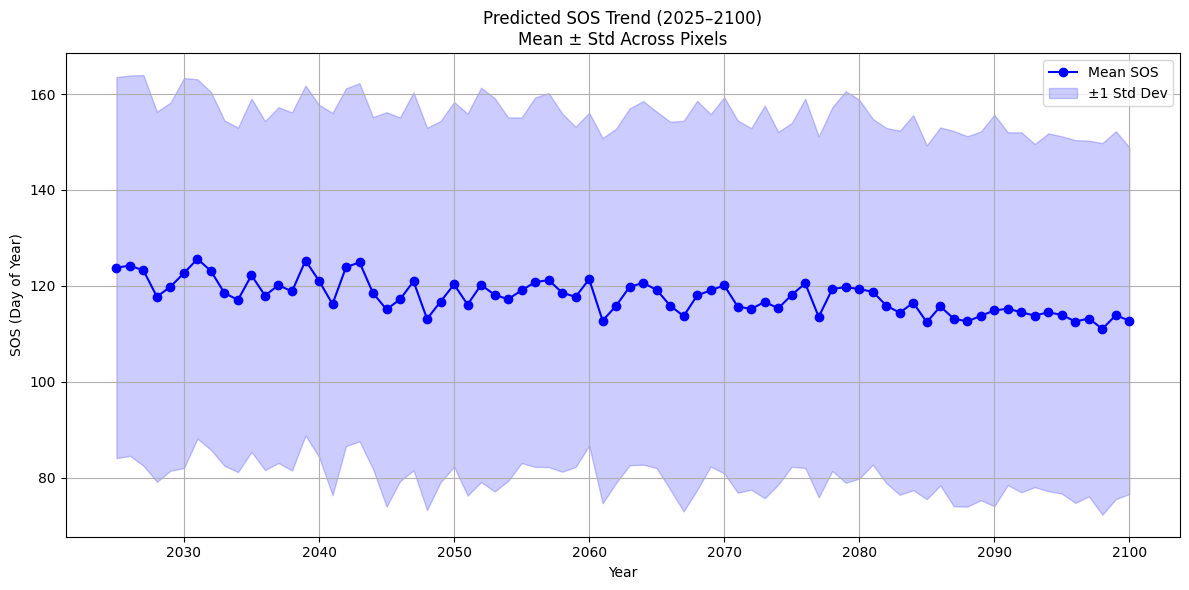

In [164]:
model_list = get_model_list()
sos_projection = predict_sos(eos_sos_data, envir_data, m1_params, model_list, start_year, end_year)
plot_sos_trend(sos_projection, start_year, end_year)

In [165]:
pd.to_pickle(sos_projection, "..\\data\\tables\\params\\ssp245\\sos_projection_1600_3200.pkl")

In [113]:
## Train EOS models

In [ ]:
## Models
## CDD
def CDD_model(par, data):
    if len(par) != 2:
        raise ValueError("model parameter(s) out of range (too many, too few)")

    T_base, F_crit = par
    Tmini = data['Tmini']  # shape: (366, num_sites)
    # print(Tmini)
    # Calculate chilling rate (Rf)
    Rf = Tmini - T_base
    Rf[Rf > 0] = 0
    # print(Rf)
    # Determine start day (t0) for chilling accumulation after day 200
    t0 = []
    for col in range(Tmini.shape[1]):
        temp_series = Tmini[:, col]
        below_base = np.where(temp_series < T_base)[0]
        # print(temp_series)
        # print(T_base)
        # print(below_base)
        # print('')
        later_days = below_base[below_base > 173]
        # print('later_days', later_days)
        if len(later_days) == 0:
            t0.append(174)  # Default to day 201 if none found
        else:
            t0.append(later_days[0])

    # Nullify values before t0
    for col in range(Tmini.shape[1]):
        Rf[:t0[col], col] = 0
    
    # Compute doy when cumulative Rf exceeds F_crit
    doy = []
    for col in range(Rf.shape[1]):
        cumulative = np.cumsum(Rf[:, col])
        # print("F_crit", F_crit)
        # print("cumulative[-1]", cumulative[-1])
        valid_days = np.where(cumulative <= F_crit)[0]
        doy_val = valid_days[0] + 1 if len(valid_days) > 0 else np.nan
        # doy_val = valid_days[0] + 1 if len(valid_days) > 0 else 365

        doy.append(doy_val)
    # print('CDD', doy) 
    return np.array(doy)

## DM
def DM_model(par, data):
    if len(par) != 3:
        raise ValueError("model parameter(s) out of range (too many, too few)")

    T_base, P_base, F_crit = par
    Tmini = data['Tmini']      # shape: (days, sites)
    Li = data['Li']            # shape: (days, sites)
    # print(Tmini)
    # print(Li/P_base)
    # Rate function: only negative values contribute
    Rf = (Tmini - T_base) * (Li / P_base)
    # print('(Tmini - T_base)', (Tmini - T_base))
    # print('(Li / P_base)', (Li / P_base))
    # print('Rf', Rf)

    Rf[Rf > 0] = 0

    
    # Determine start day (t0) for chilling accumulation after day 200
    t0 = []
    for col in range(Tmini.shape[1]):
        temp_series = Tmini[:, col]
        below_base = np.where(temp_series < T_base)[0]
        # print(temp_series)
        # print(T_base)
        # print(below_base)
        # print('')
        later_days = below_base[below_base > 173]
        # print('later_days', later_days)
        if len(later_days) == 0:
            t0.append(174)  # Default to day 201 if none found
        else:
            t0.append(later_days[0])

    # Nullify values before t0
    for col in range(Tmini.shape[1]):
        Rf[:t0[col], col] = 0

    # Compute doy when cumulative Rf exceeds F_crit
    doy = []
    for col in range(Rf.shape[1]):
        cumulative = np.cumsum(Rf[:, col])
        # print("F_crit", F_crit)
        # print("cumulative[-1]", cumulative[-1])
        valid_days = np.where(cumulative <= F_crit)[0]
        doy_val = valid_days[0] + 1 if len(valid_days) > 0 else np.nan
        # doy_val = valid_days[0] + 1 if len(valid_days) > 0 else 365

        doy.append(doy_val) 
    # print('DM', doy) 
    return np.array(doy)

## SIAM
def SIAM_model(par, predictor, data):
    if len(par) != 4:
        raise ValueError("model parameter(s) out of range (too many, too few)")
    # print('par', par)
    # print('predictor', predictor)
    # print('data', data)
    T_base, P_base, a, b = par
    Tmini = data["Tmini"]
    Li = data["Li"]

    # Rf = 1 / (1 + np.exp(a * (Tmini * Li - b)))
    Rf = (Tmini - T_base) * (Li / P_base)
    Rf[Rf > 0] = 0

    # Determine start day (t0) for chilling accumulation after day 200
    t0 = []
    for col in range(Tmini.shape[1]):
        temp_series = Tmini[:, col]
        below_base = np.where(temp_series < T_base)[0]
        # print(temp_series)
        # print(T_base)
        # print(below_base)
        # print('')
        later_days = below_base[below_base > 173]
        # print('later_days', later_days)
        if len(later_days) == 0:
            t0.append(174)  # Default to day 201 if none found
        else:
            t0.append(later_days[0])

    # Nullify values before t0
    for col in range(Tmini.shape[1]):
        Rf[:t0[col], col] = 0
    # print(predictor)
    # print(type(predictor))
    # Compute doy when cumulative Rf exceeds F_crit
    doy = []
    # print(Rf.shape[1])
    # print(predictor)
    predictor = predictor.flatten()

    baseline_mean = np.mean(predictor)
    predictor = predictor - baseline_mean
    for col in range(Rf.shape[1]):
        cumulative = np.cumsum(Rf[:, col])
        # print("F_crit", F_crit)
        # print("cumulative[-1]", cumulative[-1])
        # print(cumulative)
        # print(predictor.shape)
        S_a = predictor[col]
        # print('cumulative', cumulative)
        # print('S_a', S_a)
        # print('-(a + b * S_a)', -(a + b * S_a))
        valid_days = np.where(cumulative <= -(a + b * S_a))[0]
        doy_val = valid_days[0] + 1 if len(valid_days) > 0 else np.nan
        # print(doy_val)
        # doy_val = valid_days[0] + 1 if len(valid_days) > 0 else 365

        doy.append(doy_val)
    # print(doy) 
    return np.array(doy)

## SIAMN
def SIAMN_model(par, predictor, data):
    if len(par) != 5:
        raise ValueError("Expected 3 parameters: T_b, a, F_crit")

    T_b, P_base, a, a1, b1 = par
    Tmini = data['Tmini']  # (days, sites)
    Li = data['Li']            # shape: (days, sites)

    # print('--')

    # Chilling response function (sigmoid form, negative values only)
    Rf = -(1 - 1 / (1 + np.exp(-a * (Tmini - T_b)))) * (Li / P_base)
    Rf[Rf > 0] = 0  # Only chilling (negative) values allowed
    # print("Rf", Rf)
    # Determine t0: first day after day 173 where Tmean < T_b
    t0 = []
    days = np.arange(1, Tmini.shape[0] + 1)

    for c in range(Tmini.shape[1]):
        below_base = np.where(Tmini[:, c] < T_b)[0]
        after_173 = below_base[below_base > 173]

        if len(after_173) == 0:
            t0.append(Tmini.shape[0])  # No valid chilling period
        else:
            t0.append(after_173[0])

    # Zero out chilling accumulation before t0
    for c, t0_day in enumerate(t0):
        Rf[:t0_day+1, c] = 0  # Include t0

    # Determine DOY: first day when cumulative chilling <= F_crit
    predictor = predictor.flatten()

    baseline_mean = np.mean(predictor)
    predictor = predictor - baseline_mean
    doy = []
    for col in range(Rf.shape[1]):
        cumulative = np.cumsum(Rf[:, col])
        S_a = predictor[col]
        valid_days = np.where(cumulative <= -(a1 + b1 * S_a))[0]
        # print("a1", a1, "b1", b1, "S_a", S_a)
        # print('(-(c + d * S_a)', -(a1 + b1 * S_a))
        # print('cumulative[-1]', cumulative[-1])
        # print('-')
        doy_val = valid_days[0] + 1 if len(valid_days) > 0 else np.nan
        doy.append(doy_val)
    # print(doy) 
    return np.array(doy)

## SIAMNP
def SIAMNP_model(par, predictor, data):
    if len(par) != 7:
        raise ValueError("Expected 3 parameters: T_b, a, F_crit")

    T_b, P_base, a, a1, b1, c, p_opt = par
    Tmini = data['Tmini']  # (days, sites)
    Li = data['Li']            # shape: (days, sites)
    Pmean = data['Pmean']  # (days, sites)

    # p_opt = 1.25
    P_mod = 1 - np.exp(-((Pmean - p_opt) ** 2) / (2 * c ** 2))  # shape: (days, sites)

    # Chilling response function (sigmoid form, negative values only)
    Rf = -(1 - 1 / (1 + np.exp(-a * (Tmini - T_b)))) * (Li / P_base)
    Rf[Rf > 0] = 0  # Only chilling (negative) values allowed
    # print("Rf", Rf)
    # Determine t0: first day after day 173 where Tmean < T_b
    t0 = []
    days = np.arange(1, Tmini.shape[0] + 1)

    for c in range(Tmini.shape[1]):
        below_base = np.where(Tmini[:, c] < T_b)[0]
        after_173 = below_base[below_base > 173]

        if len(after_173) == 0:
            t0.append(Tmini.shape[0])  # No valid chilling period
        else:
            t0.append(after_173[0])

    # Zero out chilling accumulation before t0
    for c, t0_day in enumerate(t0):
        Rf[:t0_day+1, c] = 0  # Include t0

    # Determine DOY: first day when cumulative chilling <= F_crit
    predictor = predictor.flatten()
    P_mod = P_mod.flatten()

    baseline_mean = np.mean(predictor)
    predictor = predictor - baseline_mean
    
    doy = []
    for col in range(Rf.shape[1]):
        cumulative = np.cumsum(Rf[:, col])
        S_a = predictor[col]
        valid_days = np.where(cumulative <= -(a1 + b1 * S_a) * (1 - P_mod[col]))[0]
        # print("a1", a1, "b1", b1, "S_a", S_a, "P_mod[col]", 1-P_mod[col])
        # print('-(a1 + b1 * S_a) * (1-P_mod[col])', -(a1 + b1 * S_a) * (1-P_mod[col]))
        # print('cumulative[-1]', cumulative[-1])
        # print('-')
        doy_val = valid_days[0] + 1 if len(valid_days) > 0 else np.nan
        doy.append(doy_val)
    # print(doy) 
    return np.array(doy)



In [115]:
## Train, validate, and plot model performance by pixel
def get_model_list():
    import numpy as np
    import pandas as pd
    from scipy.optimize import dual_annealing
    from scipy.stats import pearsonr
    from scipy.optimize import differential_evolution
    from scipy.optimize import minimize
    
    import time 
    start_time = time.time()
    
    model_list = {
        'CDD': {'fun': CDD_model, 'init': [20, -20], 'lower': [10, -5000], 'upper': [25, 0]},
        'DM': {'fun': DM_model, 'init': [20, 12, -20], 'lower': [10, 10, -3300], 'upper': [25, 16, 0]},
        'SIAM': {'fun': SIAM_model, 'init': [20, 12, 20, 0], 'lower': [10, 10, 0, -2], 'upper': [25, 16, 2200, 2]},
        'SIAMN': {'fun': SIAMN_model, 'init': [20, 12, 0.5, 20, 0], 'lower': [15, 10, 0.01, 1, -2], 'upper': [30, 16, 2, 270, 2]},  
        'SIAMNP': {'fun': SIAMNP_model, 'init': [20, 12, 0.5, 20, 0, 2, 1], 'lower': [15, 10, 0.01, 1, -1, 1, 0.05], 'upper': [30, 16, 2, 295, 1, 10, 3]},  
    }
    return model_list

In [ ]:
# Process and merge temperature data from 1982 to 2016
def process_daily_min_t_data(df):
    for year in range(1982, 2017):
        path_min = f'../data/tables/daily_t_1982-2016/daily_min_t/daily_min_t_{year}.csv' 
    
        print("year", year)
    
        if os.path.exists(path_min):# and os.path.exists(path_mean) and os.path.exists(path_max):
            df_min = pd.read_csv(path_min).drop(columns=["veg_class"])
  
            # Rename columns with proper year and prefix
            def fix_column_names(df, year, prefix):
                new_columns = {}
                for col in df.columns:
                    new_col = col
                    if '_1982_' in col:
                        new_col = new_col.replace('1982', str(year))
                    # Ensure correct prefix
                    if f'daily_{prefix}_t_' not in new_col:
                        for p in ['min', 'mean', 'max']:
                            new_col = new_col.replace(f'daily_{p}_t_', f'daily_{prefix}_t_')
                    new_columns[col] = new_col
                return df.rename(columns=new_columns)
            
            # Apply renaming
            df_min = fix_column_names(df_min, year, prefix="min")

            df_year = df_min
            df = df.merge(df_year, on=['latitude', 'longitude'], how='inner')
            # print(df.shape)
        else:
            print(f"Missing data for year {year}. Skipping.")

    return df

In [120]:
## Convert envir data
def convert_envir_data(envir_data):
    import pandas as pd
    maxiteration = 10

    # Extract relevant columns
    min_cols = [col for col in envir_data.columns if 'daily_min_t' in col]


    id_vars = ['latitude', 'longitude']

    # Melt temperature datasets
    min_df = envir_data[id_vars + min_cols].melt(
        id_vars=id_vars, value_name='temp_min', var_name='date_col')


    for df in [min_df]:
        df['date'] = df['date_col'].str.extract(r'(\d{4}_\d{2}_\d{2})')

    merged_df = min_df
    
    # Convert to datetime, extract year and DOY
    merged_df['date'] = pd.to_datetime(merged_df['date'], format='%Y_%m_%d')
    merged_df['year'] = merged_df['date'].dt.year
    merged_df['doy'] = merged_df['date'].dt.dayofyear

    # Convert from Kelvin to Celsius
    merged_df['temp_min'] = merged_df['temp_min'] - 273.15

    # Pivot to get one column per year/temp type
    pivot_df = merged_df.pivot_table(
        index=['latitude', 'longitude', 'doy'],
        columns='year',
        # values=['temp_min', 'temp_mean', 'temp_max']
        values=['temp_min']
    ).reset_index()

    # Flatten column MultiIndex and rename properly
    pivot_df.columns = ['latitude', 'longitude', 'doy'] + [
        col.replace('temp_min', 'daily_min_t')
        for col in [f"{var}_{year}" for var, year in pivot_df.columns[3:]]
    ]

    # Generate full index of all DOYs per pixel
    all_doys = pd.DataFrame({'doy': range(1, 367)})
    pixels = pivot_df[['latitude', 'longitude']].drop_duplicates()
    full_index = pixels.merge(all_doys, how='cross')

    # Merge with full pivoted data
    merged_full = pd.merge(full_index, pivot_df, on=['latitude', 'longitude', 'doy'], how='left')

    # Fill missing values
    for col in merged_full.columns:
        if 'daily_min_t' in col or 'daily_mean_t' in col or 'daily_max_t' in col:
            merged_full[col] = merged_full[col].fillna(999)

    return merged_full

In [ ]:
# Extract phenology data
def extract_phenology_data(df):
    eos_sos_data = df.loc[:, df.columns.str.contains('sos_|eos_|latitude|longitude')]
    # print(eos_sos_data)
    
    # Extract environmental data
    cols = [col for col in df.columns if any(f't_{year}' in col for year in map(str, range(1982, 2017)))] + ['latitude', 'longitude']
    
    # Drop seasonal/annual summaries if they exist
    seasonal_cols = ['spring', 'summer', 'autumn']
    for year in range(1982, 2017):
        for season in seasonal_cols:
            col_name = f'{season}_t_{year}'
            if col_name in cols:
                cols.remove(col_name)
    
    envir_data = df[cols]
    
    # Convert environmental data
    envir_data = convert_envir_data(envir_data)
    
    # De-fragment DataFrame to improve performance
    envir_data = envir_data.copy()
    
    # Add day length
    envir_data['Li'] = envir_data.apply(lambda row: day_length(row['doy'], row['latitude']), axis=1)
    # envir_data = envir_data.drop(columns='latitude')
    # print(envir_data)
    prcp_data = df.loc[:, df.columns.str.contains('annual_p|latitude|longitude')]
    # print(prcp_data)
    return eos_sos_data, envir_data, prcp_data

In [ ]:
## Train model and get params
def train_eos_models(eos_sos_data, envir_data, prcp_data, model_list):
    import numpy as np
    import time
    from scipy.optimize import dual_annealing
    maxiteration = 10
    # Extract available years from eos_sos_data
    all_eos_cols = [col for col in eos_sos_data.columns if col.startswith('eos_')]
    available_years = sorted([int(col.split('_')[1]) for col in all_eos_cols])
    
    pixel_results = []
    params = []
    start_time = time.time()
    
    for pixel_index, site in eos_sos_data.iterrows():
        target_lat = site['latitude']
        target_lon = site['longitude']
        
        envir_sub = envir_data[
            (envir_data["latitude"] == target_lat) & 
            (envir_data["longitude"] == target_lon)
        ].dropna()
        prcp_sub = prcp_data[
            (prcp_data["latitude"] == target_lat) & 
            (prcp_data["longitude"] == target_lon)
        ].dropna()
        
        # Use all years for training
        train_years = available_years
        eos_train_cols = [f'eos_{year}' for year in train_years]
        min_t_train_cols = [f'daily_min_t_{year}' for year in train_years]
        mean_p_train_cols = [f'annual_p_{year}' for year in train_years]
        sos_train_cols = [f'sos_{year}' for year in train_years]
        Li_train = np.tile(envir_sub['Li'].values[:, None], (1, len(train_years)))
    
        for model_name, model_info in model_list.items():
            observed_DOY_train = site[eos_train_cols].astype(float).to_numpy()
            # print(observed_DOY_train)
            if model_name in ['PM_PC_NCDD2', 'SIAMNP']:
                data_list_train = {
                    'Tmini': envir_sub[min_t_train_cols].to_numpy(),
                    'Pmean': prcp_sub[mean_p_train_cols].to_numpy(),
                    'Li': Li_train,
                    'transition_dates': observed_DOY_train
                }
            else:
                data_list_train = {
                    'Tmini': envir_sub[min_t_train_cols].to_numpy(),
                    'Li': Li_train,
                    'transition_dates': observed_DOY_train
                }
            if model_name in ['SIAM', 'SIAMN', 'SIAMNP']:
                predictor1 = site[sos_train_cols].astype(float).to_numpy()
                # print(predictor1)
            def cost_function(par):
                if not np.all(np.isfinite(par)):
                    return 1e10
                try:
                    if model_name in ['SIAM', 'SIAMN', 'SIAMNP']:
                        predicted = model_info['fun'](par, predictor1, data_list_train)
                    else:
                        predicted = model_info['fun'](par, data_list_train)
                except:
                    return 1e10
    
                if predicted is None or not np.all(np.isfinite(predicted)):
                    return 1e10
                # print(predicted)
                return np.sqrt(np.mean((predicted - observed_DOY_train) ** 2))
    
            bounds = list(zip(model_info['lower'], model_info['upper']))
            result = dual_annealing(cost_function, bounds=bounds, maxiter=maxiteration, seed=42)
            # print(bounds)
            # print(result.x)
            params.append({
                'latitude': target_lat,
                'longitude': target_lon,
                'model': model_name,
                'params': result.x
            })
    
    print("Parameter estimation done!")
    print(params)
    print(f"Time taken: {time.time() - start_time:.2f} seconds")
    return params

In [123]:
## Train EOS model
df = filter_satellite_data()
df = process_daily_min_t_data(df)
df["latitude"] = snap_to_array(df["latitude"].values, latitude)
df["longitude"] = snap_to_array(df["longitude"].values, longitude)
df["latitude"] = df["latitude"].round(4)
df["longitude"] = df["longitude"].round(4)
df = df.groupby(["latitude", "longitude"], as_index=False).mean()
eos_sos_data, envir_data, prcp_data = extract_phenology_data(df)

year 1982
year 1983
year 1984
year 1985
year 1986
year 1987
year 1988
year 1989
year 1990
year 1991
year 1992
year 1993
year 1994
year 1995
year 1996
year 1997
year 1998
year 1999
year 2000
year 2001
year 2002
year 2003
year 2004
year 2005
year 2006
year 2007
year 2008
year 2009
year 2010
year 2011
year 2012
year 2013
year 2014
year 2015
year 2016


In [124]:
model_list = get_model_list()
eos_params = train_eos_models(eos_sos_data, envir_data, prcp_data, model_list)

Parameter estimation done!
[{'latitude': 30.6283, 'longitude': -92.5, 'model': 'CDD', 'params': array([  22.60043493, -246.42846795])}, {'latitude': 30.6283, 'longitude': -92.5, 'model': 'DM', 'params': array([  24.79703785,   14.41877454, -399.08690646])}, {'latitude': 30.6283, 'longitude': -92.5, 'model': 'SIAM', 'params': array([ 24.78692354,  14.2083831 , 407.01238071,  -1.95605691])}, {'latitude': 30.6283, 'longitude': -92.5, 'model': 'SIAMN', 'params': array([20.93410693, 11.35911902,  1.12762771, 46.41071169, -0.28843646])}, {'latitude': 30.6283, 'longitude': -92.5, 'model': 'SIAMNP', 'params': array([ 28.15127627,  13.57425301,   1.61150099, 120.16678643,
        -0.74071297,   6.21783283,   0.86316108])}, {'latitude': 30.6283, 'longitude': 95.0, 'model': 'CDD', 'params': array([   19.46031724, -1105.33302622])}, {'latitude': 30.6283, 'longitude': 95.0, 'model': 'DM', 'params': array([   21.14421769,    10.21609151, -1734.42245877])}, {'latitude': 30.6283, 'longitude': 95.0, 'm

In [125]:
pd.to_pickle(eos_params, "..\\data\\tables\\params\\ssp245\\eos_params.pkl")

In [176]:
# eos_params = pd.read_pickle("..\\data\\tables\\params\\ssp245\\eos_params.pkl")
sos_projection = pd.read_pickle("..\\data\\tables\\params\\ssp245\\sos_projection_1600_3200.pkl")

In [177]:
eos_params = pd.read_pickle("..\\data\\tables\\params\\1982-2016\\evaluation_results_1600_3200.pkl")

In [178]:
## Predict EOS

In [ ]:
## Models
## CDD
def CDD_model(par, data):
    if len(par) != 2:
        raise ValueError("model parameter(s) out of range (too many, too few)")

    T_base, F_crit = par
    Tmini = data['Tmini']  # shape: (366, num_sites)
    # print(Tmini)
    # Calculate chilling rate (Rf)
    Rf = Tmini - T_base
    Rf[Rf > 0] = 0
    # print(Rf)
    # Determine start day (t0) for chilling accumulation after day 200
    t0 = []
    for col in range(Tmini.shape[1]):
        temp_series = Tmini[:, col]
        below_base = np.where(temp_series < T_base)[0]
        # print(temp_series)
        # print(T_base)
        # print(below_base)
        # print('')
        later_days = below_base[below_base > 173]
        # print('later_days', later_days)
        if len(later_days) == 0:
            t0.append(174)  # Default to day 201 if none found
        else:
            t0.append(later_days[0])

    # Nullify values before t0
    for col in range(Tmini.shape[1]):
        Rf[:t0[col], col] = 0
    
    # Compute doy when cumulative Rf exceeds F_crit
    doy = []
    for col in range(Rf.shape[1]):
        cumulative = np.cumsum(Rf[:, col])
        # print("F_crit", F_crit)
        # print("cumulative[-1]", cumulative[-1])
        valid_days = np.where(cumulative <= F_crit)[0]
        # doy_val = valid_days[0] + 1 if len(valid_days) > 0 else np.nan
        doy_val = valid_days[0] + 1 if len(valid_days) > 0 else 365

        doy.append(doy_val)
    # print('CDD', doy) 
    return np.array(doy)

## DM
def DM_model(par, data):
    if len(par) != 3:
        raise ValueError("model parameter(s) out of range (too many, too few)")

    T_base, P_base, F_crit = par
    Tmini = data['Tmini']      # shape: (days, sites)
    Li = data['Li']            # shape: (days, sites)
    # print(Tmini)
    # print(Li/P_base)
    # Rate function: only negative values contribute
    Rf = (Tmini - T_base) * (Li / P_base)
    # print('(Tmini - T_base)', (Tmini - T_base))
    # print('(Li / P_base)', (Li / P_base))
    # print('Rf', Rf)

    Rf[Rf > 0] = 0

    
    # Determine start day (t0) for chilling accumulation after day 200
    t0 = []
    for col in range(Tmini.shape[1]):
        temp_series = Tmini[:, col]
        below_base = np.where(temp_series < T_base)[0]
        # print(temp_series)
        # print(T_base)
        # print(below_base)
        # print('')
        later_days = below_base[below_base > 173]
        # print('later_days', later_days)
        if len(later_days) == 0:
            t0.append(174)  # Default to day 201 if none found
        else:
            t0.append(later_days[0])

    # Nullify values before t0
    for col in range(Tmini.shape[1]):
        Rf[:t0[col], col] = 0

    # Compute doy when cumulative Rf exceeds F_crit
    doy = []
    for col in range(Rf.shape[1]):
        cumulative = np.cumsum(Rf[:, col])
        # print("F_crit", F_crit)
        # print("cumulative[-1]", cumulative[-1])
        valid_days = np.where(cumulative <= F_crit)[0]
        # doy_val = valid_days[0] + 1 if len(valid_days) > 0 else np.nan
        doy_val = valid_days[0] + 1 if len(valid_days) > 0 else 365

        doy.append(doy_val) 
    # print('DM', doy) 
    return np.array(doy)

## SIAM
def SIAM_model(par, predictor, data):
    if len(par) != 4:
        raise ValueError("model parameter(s) out of range (too many, too few)")
    # print('par', par)
    # print('predictor', predictor)
    # print('data', data)
    T_base, P_base, a, b = par
    Tmini = data["Tmini"]
    Li = data["Li"]

    # Rf = 1 / (1 + np.exp(a * (Tmini * Li - b)))
    Rf = (Tmini - T_base) * (Li / P_base)
    Rf[Rf > 0] = 0

    # Determine start day (t0) for chilling accumulation after day 200
    t0 = []
    for col in range(Tmini.shape[1]):
        temp_series = Tmini[:, col]
        below_base = np.where(temp_series < T_base)[0]
        # print(temp_series)
        # print(T_base)
        # print(below_base)
        # print('')
        later_days = below_base[below_base > 173]
        # print('later_days', later_days)
        if len(later_days) == 0:
            t0.append(174)  # Default to day 201 if none found
        else:
            t0.append(later_days[0])

    # Nullify values before t0
    for col in range(Tmini.shape[1]):
        Rf[:t0[col], col] = 0
    # print(predictor)
    # print(type(predictor))
    # Compute doy when cumulative Rf exceeds F_crit
    doy = []
    # print(Rf.shape[1])
    # print(predictor)
    # predictor = predictor.flatten()

    baseline_mean = np.mean(predictor)
    predictor = predictor - baseline_mean
    for col in range(Rf.shape[1]):
        cumulative = np.cumsum(Rf[:, col])
        # print("F_crit", F_crit)
        # print("cumulative[-1]", cumulative[-1])
        # print(cumulative)
        # print(predictor.shape)
        S_a = predictor[col]
        # print('cumulative', cumulative)
        # print('S_a', S_a)
        # print('-(a + b * S_a)', -(a + b * S_a))
        valid_days = np.where(cumulative <= -(a + b * S_a))[0]
        # doy_val = valid_days[0] + 1 if len(valid_days) > 0 else np.nan
        doy_val = valid_days[0] + 1 if len(valid_days) > 0 else 365

        doy.append(doy_val)
    # print(doy) 
    return np.array(doy)

## SIAMN
def SIAMN_model(par, predictor, data):
    if len(par) != 5:
        raise ValueError("Expected 3 parameters: T_b, a, F_crit")

    T_b, P_base, a, a1, b1 = par
    Tmini = data['Tmini']  # (days, sites)
    Li = data['Li']            # shape: (days, sites)

    # print('--')

    # Chilling response function (sigmoid form, negative values only)
    Rf = -(1 - 1 / (1 + np.exp(-a * (Tmini - T_b)))) * (Li / P_base)
    Rf[Rf > 0] = 0  # Only chilling (negative) values allowed
    # print("Rf", Rf)
    # Determine t0: first day after day 173 where Tmean < T_b
    t0 = []
    days = np.arange(1, Tmini.shape[0] + 1)

    for c in range(Tmini.shape[1]):
        below_base = np.where(Tmini[:, c] < T_b)[0]
        after_173 = below_base[below_base > 173]

        if len(after_173) == 0:
            t0.append(Tmini.shape[0])  # No valid chilling period
        else:
            t0.append(after_173[0])

    # Zero out chilling accumulation before t0
    for c, t0_day in enumerate(t0):
        Rf[:t0_day+1, c] = 0  # Include t0

    # Determine DOY: first day when cumulative chilling <= F_crit
    # predictor = predictor.flatten()

    baseline_mean = np.mean(predictor)
    predictor = predictor - baseline_mean
    doy = []
    for col in range(Rf.shape[1]):
        cumulative = np.cumsum(Rf[:, col])
        S_a = predictor[col]
        valid_days = np.where(cumulative <= -(a1 + b1 * S_a))[0]
        # print("a1", a1, "b1", b1, "S_a", S_a)
        # print('(-(c + d * S_a)', -(a1 + b1 * S_a))
        # print('cumulative[-1]', cumulative[-1])
        # print('-')
        # doy_val = valid_days[0] + 1 if len(valid_days) > 0 else np.nan
        doy_val = valid_days[0] + 1 if len(valid_days) > 0 else 365

        doy.append(doy_val)
    # print(doy) 
    return np.array(doy)

## SIAMNP
def SIAMNP_model(par, predictor, data):
    if len(par) != 7:
        raise ValueError("Expected 3 parameters: T_b, a, F_crit")

    T_b, P_base, a, a1, b1, c, p_opt = par
    Tmini = data['Tmini']  # (days, sites)
    Li = data['Li']            # shape: (days, sites)
    Pmean = data['Pmean']  # (days, sites)

    # p_opt = 1.25
    P_mod = 1 - np.exp(-((Pmean - p_opt) ** 2) / (2 * c ** 2))  # shape: (days, sites)

    # Chilling response function (sigmoid form, negative values only)
    Rf = -(1 - 1 / (1 + np.exp(-a * (Tmini - T_b)))) * (Li / P_base)
    Rf[Rf > 0] = 0  # Only chilling (negative) values allowed
    # print("Rf", Rf)
    # Determine t0: first day after day 173 where Tmean < T_b
    t0 = []
    days = np.arange(1, Tmini.shape[0] + 1)

    for c in range(Tmini.shape[1]):
        below_base = np.where(Tmini[:, c] < T_b)[0]
        after_173 = below_base[below_base > 173]

        if len(after_173) == 0:
            t0.append(Tmini.shape[0])  # No valid chilling period
        else:
            t0.append(after_173[0])

    # Zero out chilling accumulation before t0
    for c, t0_day in enumerate(t0):
        Rf[:t0_day+1, c] = 0  # Include t0

    # Determine DOY: first day when cumulative chilling <= F_crit
    # predictor = predictor.flatten()
    P_mod = P_mod.flatten()

    baseline_mean = np.mean(predictor)
    predictor = predictor - baseline_mean
    
    doy = []
    for col in range(Rf.shape[1]):
        cumulative = np.cumsum(Rf[:, col])
        S_a = predictor[col]
        valid_days = np.where(cumulative <= -(a1 + b1 * S_a) * (1 - P_mod[col]))[0]
        # print("a1", a1, "b1", b1, "S_a", S_a, "P_mod[col]", 1-P_mod[col])
        # print('-(a1 + b1 * S_a) * (1-P_mod[col])', -(a1 + b1 * S_a) * (1-P_mod[col]))
        # print('cumulative[-1]', cumulative[-1])
        # print('-')
        # doy_val = valid_days[0] + 1 if len(valid_days) > 0 else np.nan
        doy_val = valid_days[0] + 1 if len(valid_days) > 0 else 365

        doy.append(doy_val)
    # print(doy) 
    return np.array(doy)



In [180]:
## Train, validate, and plot model performance by pixel
def get_model_list():
    import numpy as np
    import pandas as pd
    from scipy.optimize import dual_annealing
    from scipy.stats import pearsonr
    from scipy.optimize import differential_evolution
    from scipy.optimize import minimize
    
    import time 
    start_time = time.time()
    
    model_list = {
        'CDD': {'fun': CDD_model, 'init': [20, -20], 'lower': [10, -5000], 'upper': [25, 0]},
        'DM': {'fun': DM_model, 'init': [20, 12, -20], 'lower': [10, 10, -3300], 'upper': [25, 16, 0]},
        'SIAM': {'fun': SIAM_model, 'init': [20, 12, 20, 0], 'lower': [10, 10, 0, -2], 'upper': [25, 16, 2200, 2]},
        'SIAMN': {'fun': SIAMN_model, 'init': [20, 12, 0.5, 20, 0], 'lower': [15, 10, 0.01, 1, -2], 'upper': [30, 16, 2, 270, 2]},  
        'SIAMNP': {'fun': SIAMNP_model, 'init': [20, 12, 0.5, 20, 0, 2, 1], 'lower': [15, 10, 0.01, 1, -1, 1, 0.05], 'upper': [30, 16, 2, 295, 1, 10, 3]},  
    }
# maxiteration = 10
    return model_list

In [181]:
## Convert envir data
def convert_envir_data(envir_data):
    import pandas as pd

    # Extract relevant columns
    min_cols = [col for col in envir_data.columns if 'daily_min_t' in col]


    id_vars = ['latitude', 'longitude']
    # print(envir_data)
    # Melt temperature datasets
    min_df = envir_data[id_vars + min_cols].melt(
        id_vars=id_vars, value_name='temp_min', var_name='date_col')
    # print(min_df)

    for df in [min_df]:
        df['date'] = df['date_col'].str.extract(r'(\d{4}_\d{2}_\d{2})')

    merged_df = min_df
    
    # Convert to datetime, extract year and DOY
    merged_df['date'] = pd.to_datetime(merged_df['date'], format='%Y_%m_%d')
    merged_df['year'] = merged_df['date'].dt.year
    merged_df['doy'] = merged_df['date'].dt.dayofyear

    # Convert from Kelvin to Celsius
    merged_df['temp_min'] = merged_df['temp_min'] - 0

    # Pivot to get one column per year/temp type
    pivot_df = merged_df.pivot_table(
        index=['latitude', 'longitude', 'doy'],
        columns='year',
        # values=['temp_min', 'temp_mean', 'temp_max']
        values=['temp_min']
    ).reset_index()

    # Flatten column MultiIndex and rename properly
    pivot_df.columns = ['latitude', 'longitude', 'doy'] + [
        col.replace('temp_min', 'daily_min_t')
        for col in [f"{var}_{year}" for var, year in pivot_df.columns[3:]]
    ]

    # Generate full index of all DOYs per pixel
    all_doys = pd.DataFrame({'doy': range(1, 367)})
    pixels = pivot_df[['latitude', 'longitude']].drop_duplicates()
    full_index = pixels.merge(all_doys, how='cross')

    # Merge with full pivoted data
    merged_full = pd.merge(full_index, pivot_df, on=['latitude', 'longitude', 'doy'], how='left')

    # Fill missing values
    for col in merged_full.columns:
        if 'daily_min_t' in col or 'daily_mean_t' in col or 'daily_max_t' in col:
            merged_full[col] = merged_full[col].fillna(999)

    return merged_full

In [182]:
## Read params of EOS models
def read_params(df):
    import pandas as pd
    import glob
    import os
    
    # Path to your folder
    folder = ".\\results\\figure4\\pixel_results"
    # Get all CSV files
    csv_files = glob.glob(os.path.join(folder, "*.csv"))
    
    # Read and concatenate
    model_params_df = pd.concat((pd.read_csv(f) for f in csv_files), ignore_index=True)
    # print(model_params)
    model_params_df = model_params_df.drop(columns=["pixel_index"])
    df_copy = df
    df_copy["pixel_index"] = df_copy.index
    model_params_df = pd.merge(model_params_df, df_copy, on=["latitude", "longitude"], how="inner")
    model_params_df = model_params_df.drop_duplicates(subset=["pixel_index"], keep="first")
    # print(model_params_df)
    
    model_params = []
    
    # Explicit list of models you want
    models = ["CDD", "DM", "SIAM", "SIAMN", "SIAMNP"]
    
    for _, row in model_params_df.iterrows():
        pixel_index = row["pixel_index"]
        for model in models:
            # Collect only the columns for this model
            cols = [c for c in model_params_df.columns if c.startswith(model + "_param")]
            if not cols:
                continue  # skip if this model’s params not in the DataFrame
    
            # Preserve param order (param_1, param_2, ...)
            cols = sorted(cols, key=lambda x: int(x.split("_")[-1]))
    
            params = row[cols].values.astype(float)
            model_params.append({
                "pixel_index": pixel_index,
                "model": model,
                "params": params
            })
    
    # print(model_params)
    return model_params

In [ ]:
## Match future climate and avhrr pixels (daily min t)
def match_pixel_with_future_min_t(df, start_year, end_year):
    import os
    import pandas as pd
    import numpy as np
    from scipy.spatial import cKDTree
    from datetime import datetime, timedelta
    import time
    
    start = time.time()
    
    #Helper functions 
    def doy_to_date(year, doy):
        """Convert year + day-of-year to string YYYY_MM_DD."""
        return (datetime(year, 1, 1) + timedelta(days=int(doy) - 1)).strftime("%Y_%m_%d")
    
    
    if start_year == 2095:
        end = start_year + 5
    else:
        if end_year == 2100:
            end = end_year - 4
        else:
            end = end_year - 9
    #Main loop 
    for year in range(start_year, end, 10):  # 2025, 2035, ..., 2095
        path_min = f'../data/tables/daily_t_p_2025-2100/ssp245/daily_min_t_clipped/daily_min_t_clipped_2025-2100_ssp245_pixel_{year}.csv'
        print(path_min)
        if not os.path.exists(path_min):
            print(f"Missing data for year {year}. Skipping.")
            continue
    
        # Load climate grid
        df_min = pd.read_csv(path_min)

        # Add date column
        df_min["date"] = [doy_to_date(y, d) for y, d in zip(df_min["year"], df_min["doy"])]

        # Keep only needed columns
        df_min = df_min[["lat", "lon", "date", "tasmin"]]
        # print(df_min)
        
        # Pivot into wide format (lat/lon as index, each day a column)
        df_min_pivot = df_min.pivot(
            index=["lat", "lon"],
            columns="date",
            values="tasmin"
        ).reset_index()

        # Rename columns
        df_min_pivot = df_min_pivot.rename(
            columns={col: f"daily_min_t_{col}" for col in df_min_pivot.columns if col not in ["lat", "lon"]}
        )
        # Merge with df on snapped coordinates
        df = df.merge(
            df_min_pivot,
            left_on=["latitude", "longitude"],
            right_on=["lat", "lon"],
            how="inner"
        ).drop(columns=["lat", "lon"])
        # print('')
        # print(df)
        
    # Finalize
    df = df.reset_index(drop=True)
    end = time.time()
    print(f"Elapsed time: {end - start:.2f} seconds")
    return df
    # df

In [ ]:
## Match future climate and avhrr pixels (prcp)
def match_pixel_with_future_prcp(df1, start_year, end_year):
    import os
    import pandas as pd
    import numpy as np
    from scipy.spatial import cKDTree
    from datetime import datetime, timedelta
    import time
    
    start = time.time()
    
    #Helper functions 
    def doy_to_date(year, doy):
        """Convert year + day-of-year to string YYYY_MM_DD."""
        return (datetime(year, 1, 1) + timedelta(days=int(doy) - 1)).strftime("%Y_%m_%d")
    
    if start_year == 2095:
        end = start_year + 5
    else:
        if end_year == 2100:
            end = end_year - 4
        else:
            end = end_year - 9

    # Main loop 
    for year in range(start_year, end, 10):  # 2025, 2035, ..., 2095
        if year == 2025:
            path_prcp = f'../data/tables/daily_t_p_2025-2100/ssp245/prcp/annual_p_ssp245_pixel_{year+1}.csv'
        else:
            path_prcp = f'../data/tables/daily_t_p_2025-2100/ssp245/prcp/annual_p_ssp245_pixel_{year}.csv'
        # print(year)
        print(path_prcp)
        if not os.path.exists(path_prcp):
            print(f"Missing data for year {year}. Skipping.")
            continue
    
        # Load climate grid
        df_prcp = pd.read_csv(path_prcp)
        
        # Keep only needed columns 
        df_prcp = df_prcp[["lat", "lon", "year", "annual_p"]]
        
        # Pivot to wide format 
        df_prcp_pivot = df_prcp.pivot(
            index=["lat", "lon"], 
            columns="year", 
            values="annual_p"
        ).reset_index()
        
        # Rename columns to annual_p_YYYY 
        df_prcp_pivot = df_prcp_pivot.rename(
            columns={col: f"annual_p_{col}" for col in df_prcp_pivot.columns if col not in ["lat", "lon"]}
        )
        
        # Merge directly on coordinates 
        df1 = df1.merge(
            df_prcp_pivot,
            left_on=["latitude", "longitude"],
            right_on=["lat", "lon"],
            how="left"
        ).drop(columns=["lat", "lon"])
    
    # Finalize
    df1 = df1.reset_index(drop=True)
    end = time.time()
    print(f"Elapsed time: {end - start:.2f} seconds")
    return df1

In [187]:
# Extract phenology data
def extract_phenology_data(df, start_year, end_year):
    eos_sos_data = df.loc[:, df.columns.str.contains('sos_|eos_|latitude|longitude')]
    
    # Extract environmental data
    cols = [col for col in df.columns if any(f't_{year}' in col for year in map(str, range(start_year, end_year + 1)))] + ['latitude', 'longitude']
    # print(cols)
    # Drop seasonal/annual summaries if they exist
    seasonal_cols = ['spring', 'summer', 'autumn', 'annual']
    for year in range(start_year, end_year):
        for season in seasonal_cols:
            col_name = f'{season}_t_{year}'
            if col_name in cols:
                cols.remove(col_name)
    
    envir_data = df[cols]
    # print(envir_data)
    
    # Convert environmental data
    envir_data = convert_envir_data(envir_data)
    # print(envir_data)
    
    # De-fragment DataFrame to improve performance
    envir_data = envir_data.copy()
    
    # Add day length
    envir_data['Li'] = envir_data.apply(lambda row: day_length(row['doy'], row['latitude']), axis=1)
    return eos_sos_data, envir_data

In [188]:
# Extract prcp data
def filter_prcp(df1):
    df1 = df1[[c for c in df1.columns 
               if not c.startswith("annual_p_") or int(c.split("_")[-1]) >= 2024]]
    
    prcp_data = df1.loc[:, df1.columns.str.contains('annual_p|latitude|longitude')]
    return prcp_data
# print(prcp_data.head())

In [190]:
## Predict EOS
def predict_eos(eos_sos_data, envir_data, prcp_data, model_list, eos_params, start_year, end_year, sos_projection):
    import numpy as np
    import time
    import ast
    
    pixel_results = []
    start_time = time.time()
    available_years = list(range(start_year + 1, end_year + 1))  # 2025, 2026, ..., 2100
    # df_preds = df_predicted_sos
    all_predictions = []
    
    # print(df_preds)
    for pixel_index, site in eos_sos_data.iterrows():        
        target_lat = site['latitude']
        target_lon = site['longitude']
        
        envir_sub = envir_data[
            (envir_data["latitude"] == target_lat) & 
            (envir_data["longitude"] == target_lon)
        ].dropna()
        prcp_sub = prcp_data[
            (prcp_data["latitude"] == target_lat) & 
            (prcp_data["longitude"] == target_lon)].dropna()
        # print(prcp_sub)
        # print(envir_sub_sos)
        years = available_years
        min_t_train_cols = [f'daily_min_t_{year}' for year in years]
        prcp_train_cols = [f'annual_p_{year}' for year in years]
    
        # sos_train_cols = [f'sos_{year}' for year in train_years]
        Li = np.tile(envir_sub['Li'].values[:, None], (1, len(years)))
        min_t = envir_sub[min_t_train_cols]
        prcp = prcp_sub[prcp_train_cols]
        annual_cols = [c for c in prcp.columns if c.startswith("annual_p_")]
        prcp = prcp.copy()
        prcp[annual_cols] = prcp[annual_cols] / 1000
        # print(prcp[annual_cols])
        # pixel_sos = df_preds[df_preds['pixel_index'] == pixel_index]['predicted']
        pixel_sos = [
            d for d in sos_projection
            if d["latitude"] == target_lat and d["longitude"] == target_lon
            ]
        # print(pixel_sos[0]['predicted'])
        
        params_temp = [
            d for d in eos_params
            if d["latitude"] == target_lat and d["longitude"] == target_lon
        ]
        # print(type(params_temp), params_temp)
        if not params_temp:
            print(target_lat, target_lon)
            continue
        pixel_params = []
        ## Convert format of params
        for model_name, params in params_temp[0]["mean_params"].items():
            pixel_params.append({
                "model": model_name,
                "params": params
            })


        # print(pixel_params)
        # Predict for each model
        for param in pixel_params:
            # print(param)
            model_name = param['model']
            params = param['params']
            model_fun = model_list[model_name]['fun']
    
            # Prepare data input
            if model_name in ['NCDD2', 'PC_NCDD2']:
                data_list = {
                    'Tmini': min_t.to_numpy(),
                    'Li': Li
                }
            elif model_name in ['PM_PC_NCDD2', 'SIAMNP']:
                data_list = {
                    'Tmini': min_t.to_numpy(),
                    'Pmean': prcp.to_numpy(),
                    'Li': Li
                }
            else:
                data_list = {
                    'Tmini': min_t.to_numpy(),
                    'Li': Li
                }
    
            # Predict EOS
            if model_name in ['SIAM', 'SIAMN', 'SIAMNP']: 

                # print(type(pixel_sos), pixel_sos)
                # print(target_lat, target_lon, model_name, pixel_sos)
                # print(pixel_sos)
                if not pixel_sos:
                    continue
                predictor1 = pixel_sos[0]['predicted']
                predictor1 = predictor1[1:]
                # print(model_name, predictor1)
                # print(len(predictor1))
                predicted = model_fun(params, predictor1, data_list)
            else:
                predicted = model_fun(params, data_list)
    
            all_predictions.append({
                'latitude': target_lat,
                'longitude': target_lon,
                'model': model_name,
                'predicted_eos': np.array(predicted)
            })
    
    print("Prediction done!")
    end_time = time.time()
    print(f"Time taken: {end_time - start_time:.2f} seconds")
    return all_predictions

In [191]:
## Delete sos and eos outliers
def process_sos_eos(df):

    # Identify sos and eos columns
    sos_cols = [col for col in df.columns if col.startswith('sos_')]
    eos_cols = [col for col in df.columns if col.startswith('eos_')]

    # Calculate row-wise means temporarily
    df['mean_sos'] = df[sos_cols].mean(axis=1, skipna=True)
    df['mean_eos'] = df[eos_cols].mean(axis=1, skipna=True)

    # Filter based on valid ranges
    df_filtered = df[
        (df['mean_sos'].between(60, 180)) &
        (df['mean_eos'].between(200, 330))
    ].copy()

    # Drop the temporary columns
    df_filtered.drop(columns=['mean_sos', 'mean_eos'], inplace=True)

    return df_filtered


In [192]:
## Predict EOS and get trends
start_year = 2025
end_year = 2100
df = filter_satellite_data()
df = aggregate_pixel(df)

In [193]:
df = df.iloc[1600:]

In [194]:
# df = process_sos_eos(df)

In [196]:
df1 = df
df1 = match_pixel_with_future_prcp(df1, start_year, end_year)
df = match_pixel_with_future_min_t(df, start_year, end_year)

../data/tables/daily_t_p_2025-2100/ssp245/prcp/annual_p_ssp245_pixel_2026.csv
../data/tables/daily_t_p_2025-2100/ssp245/prcp/annual_p_ssp245_pixel_2035.csv
../data/tables/daily_t_p_2025-2100/ssp245/prcp/annual_p_ssp245_pixel_2045.csv
../data/tables/daily_t_p_2025-2100/ssp245/prcp/annual_p_ssp245_pixel_2055.csv
../data/tables/daily_t_p_2025-2100/ssp245/prcp/annual_p_ssp245_pixel_2065.csv
../data/tables/daily_t_p_2025-2100/ssp245/prcp/annual_p_ssp245_pixel_2075.csv
../data/tables/daily_t_p_2025-2100/ssp245/prcp/annual_p_ssp245_pixel_2085.csv
../data/tables/daily_t_p_2025-2100/ssp245/prcp/annual_p_ssp245_pixel_2095.csv
Elapsed time: 0.23 seconds
../data/tables/daily_t_p_2025-2100/ssp245/daily_min_t_clipped/daily_min_t_clipped_2025-2100_ssp245_pixel_2025.csv
../data/tables/daily_t_p_2025-2100/ssp245/daily_min_t_clipped/daily_min_t_clipped_2025-2100_ssp245_pixel_2035.csv
../data/tables/daily_t_p_2025-2100/ssp245/daily_min_t_clipped/daily_min_t_clipped_2025-2100_ssp245_pixel_2045.csv
../data

In [198]:
eos_sos_data, envir_data = extract_phenology_data(df, start_year, end_year)
prcp_data = filter_prcp(df1)

In [199]:
envir_data = envir_data.drop(columns=["daily_min_t_2025"])

In [200]:
model_list = get_model_list()
eos_projection = predict_eos(eos_sos_data, envir_data, prcp_data, model_list, eos_params, start_year, end_year, sos_projection)

Prediction done!
Time taken: 35.98 seconds


In [201]:
pd.to_pickle(eos_projection, "..\\data\\tables\\params\\ssp245\\eos_projection_1600_3200.pkl")